# Neural Networks for Handwritten Digit Recognition, Binary
In this exercise, you will use a neural network to recognize the hand-written digits zero and one.

## 1 - Packages
First, let's run the cell below to import all the packages that you will need during this assignment.

* numpy is the fundamental package for scientific computing with Python.
* matplotlib is a popular library to plot graphs in Python.
* tensorflow a popular platform for machine learning.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

### Tensorflow and Keras
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This course will be using the Keras interface.


# 2 - Neural Networks
In Course 1, you implemented logistic regression. This was extended to handle non-linear boundaries using polynomial regression. For even more complex scenarios such as image recognition, neural networks are preferred.


### Problem Statement
In this exercise, you will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits (0-9) in a future assignment.

This exercise will show you how the methods you have learned can be used for this classification task.

### DataSet

<img src="images/dataset.png"/>

In [3]:
# load dataset
X, y = load_data()

### View the variables
Let's get more familiar with your dataset.

A good place to start is to print out each variable and see what it contains.
The code below prints elements of the variables X and y.

In [4]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [5]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


#### Check the dimensions of your variables
Another way to get familiar with your data is to view its dimensions. Please print the shape of X and y and see how many training examples you have in your dataset.

In [6]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


### Visualizing the Data
You will begin by visualizing a subset of the training set.

* In the cell below, the code randomly selects 64 rows from X, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together.
* The label for each image is displayed above the image

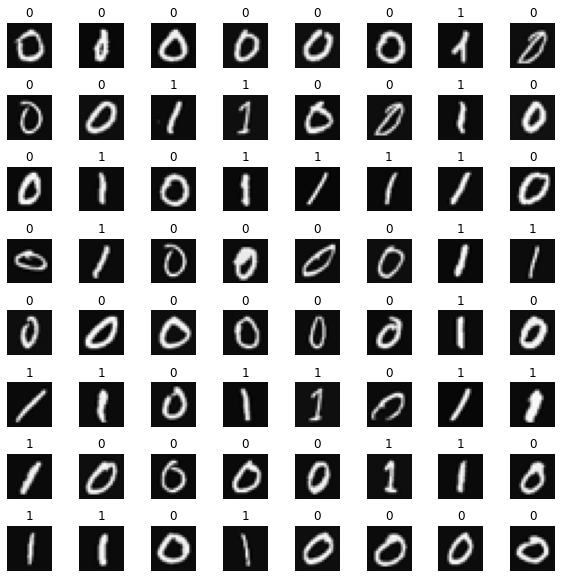

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

## Model Representation

The neural network you will use in this assignment is shown in the figure below.

* This has three dense layers with sigmoid activations.
 * Recall that our inputs are pixel values of digit images.
 * Since the images are of size 20 X 20, this gives us 400 inputs

<img src="images/modrep.png"/>

### Tensorflow Model Implementation
Tensorflow models are built layer by layer. A layer's input dimensions (S{in} above) are calculated for you. You specify a layer's output dimensions and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the model.fit statment below.

    Note: It is also possible to add an input layer that specifies the input dimension of the first layer. For example:

`tf.keras.Input(shape=(400,)), #specify input shape`

We will include that here to illuminate some model sizing.


### Exercise 1
Below, using Keras Sequential model and Dense Layer with a sigmoid activation to construct the network described above.

In [8]:
# UNQ_C1
# GRADED CELL: Sequential model

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        
        ### START CODE HERE ### 
        
        Dense(25, activation='sigmoid'),
        Dense(15, activation='sigmoid'),
        Dense(1,  activation='sigmoid')
        
        ### END CODE HERE ### 
        
    ], name = "my_model" 
)               

In [9]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [10]:
# UNIT TESTS
from public_tests import * 

test_c1(model)

All tests passed!


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [11]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters

print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [12]:
[layer1, layer2, layer3] = model.layers

In [13]:
# Examine Weights shapes

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


#### Expected Output

    W1 shape = (400, 25), b1 shape = (25,)  
    W2 shape = (25, 15), b2 shape = (15,)  
    W3 shape = (15, 1), b3 shape = (1,)
    
`xx.get_weights` returns a NumPy array. One can also access the weights directly in their tensor form. Note the shape of the tensors in the final layer.

In [14]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.06443214],
       [ 0.43455166],
       [-0.19327578],
       [-0.35849428],
       [-0.37837714],
       [-0.3667403 ],
       [ 0.19977564],
       [-0.53305507],
       [-0.2629603 ],
       [ 0.5218931 ],
       [ 0.35150987],
       [ 0.2357533 ],
       [ 0.564895  ],
       [ 0.0920974 ],
       [ 0.57200724]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data. This will be explained in more detail in the following week.

In [15]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6053
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4368
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2862
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1911
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1374
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1048
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0832
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0682
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0571
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0487
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0424
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 13/20
32/32 [==============================

To run the model on an example to make a prediction, use Keras `predict`. The input to `predict` is an array so the single example is reshaped to be two dimensional.

In [16]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")

prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 157ms/step
 predicting a zero: [[0.0163642]]
1/1 [==============================] - 0s 22ms/step
 predicting a one:  [[0.98900664]]


The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one. As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [17]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
    
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

1/1 [==============================] - 0s 22ms/step


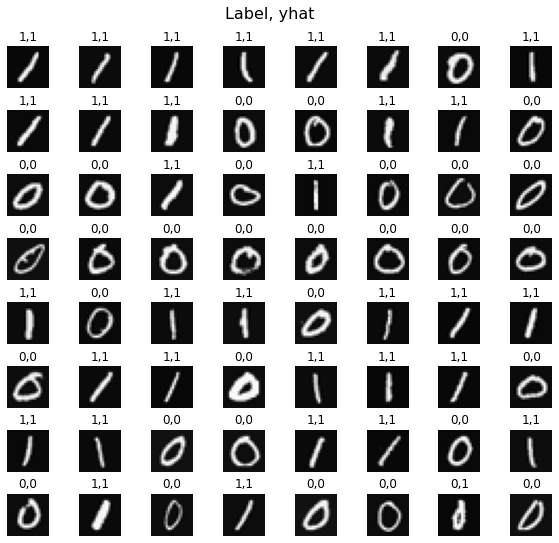

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

## NumPy Model Implementation (Forward Prop in NumPy)
As described in lecture, it is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network.

<img src="images/nummod2.png"/>

### Exercise 2
Below, build a dense layer subroutine. The example in lecture utilized a for loop to visit each unit (`j`) in the layer and perform the dot product of the weights for that unit (`W[:,j]`) and sum the bias for the unit (`b[j]`) to form z. An activation function `g(z)` is then applied to that result. This section will not utilize some of the matrix operations described in the optional lectures. These will be explored in a later section.

In [20]:
# UNQ_C2
# GRADED FUNCTION: my_dense

def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    
### START CODE HERE ### 

    for j in range(units):
        w = W[:, j]
        z = np.matmul(w, a_in) + b[j]
        a_out[j] = g(z) 
        
### END CODE HERE ### 

    return(a_out)

In [21]:
# Quick Check

x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)

A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)

print(A_tst)

[0.54735762 0.57932425 0.61063923]


**Expected Output:** 

    [0.54735762 0.57932425 0.61063923]

In [22]:
# UNIT TESTS
test_c2(my_dense)

All tests passed!


The following cell builds a three-layer neural network utilizing the `my_dense` subroutine above.

In [23]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

We can copy trained weights and biases from Tensorflow.

In [24]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()